

 
  <center><h1><span style="color:red;">Riding Dirty: Using Telematic Data to Identify Increased Liability Drivers</span></h1><br>
  


Created by <br>

<center><h3><span style="color:green;">Team SkidMarks</span></h3><br><br>

Vikram Mittal <br>
https://www.linkedin.com/pub/vikram-mittal/10/ba7/a81 <br><br>

and <br><br>

Linwood Creekmore <br>
https://www.linkedin.com/pub/linwood-creekmore-iii/38/745/a21 <br> <br> </center>


 <center>_In partial fulfillment of the requirements for the Georgetown University Data Analytics Graduate Certificate Program_</center>

<center>_April 2015 _</center>



In [46]:
from IPython.display import display
from IPython.display import Image

><center>iPython formatting guidance</center> 
><center>http://nbviewer.ipython.org/github/NelisW/ComputationalRadiometry/blob/master/01-IPythonHintsAndTips.ipynb</center>
><center> For those viewing this Notebook as a webpage, this service is provided by nbviewer:
><center>http://nbviewer.ipython.org/</center>
><center>Markdown Formatting Cheat Sheet</center>
><center>http://assemble.io/docs/Cheatsheet-Markdown.html</center>


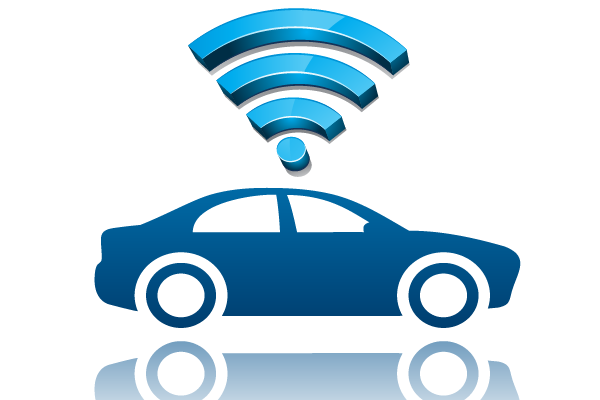

In [47]:
picUrl = 'http://software.quest-global.com/wp-content/uploads/2014/11/connectedcar-logo.png'
Embed  = Image(picUrl)
display(Embed)

### Abstract

Draft Document/Outline/Sources here: https://docs.google.com/a/georgetown.edu/document/d/1Mv2_3AfxJO6P7kxV23iKPlVOMoMqfjM6Snc7KuJe1Cg/edit

### Introduction

Quantitative risk management has been a cornerstone of the auto insurance industry for many years.  Traditionally, auto insurance premiums are calculated based on driver history, demographic factors, and geographic factors.  Driver history includes events such as accidents, moving violations, license suspensions, and mileage.  Demographic factors include age, gender, marital status, occupation, and credit score.  Geographic factors include traffic and weather patterns, as well as crime rates such as vandalism and theft.  Insurance companies combine these various factors into an expected loss model to predict the probability of a claim and the size of a claim in the future.  While insurance providers clearly rely on a wealth of information to make pricing decisions, the data still has its limitations.  For example, driver history factors describe relatively infrequent, negative events.  Additionally, insurance companies typically only have access to three to five years of driver history data per state laws.

Understanding that “more data often beats better models”, insurance companies are now looking to incorporate daily driving behavior into their premium pricing models to gain a competitive advantage.  You may be familiar with Progressive’s snapshot commercials where customers choose to have a device in their vehicle that monitors the vehicle’s position and speed.  The idea is to reward customers with good driving habits by offering them discounted premiums.  With this information, Progressive can also identify customers with risky driving habits and then initiate a variety of options to mitigate risk by offering corrective guidance, increasing premiums, or even terminating coverage.  With the prevalence of GPS devices in vehicles, either as a standalone unit or built into a driver’s cell phone, insurance companies now have access to current driver behavior to allow for more accurate predictions of claims and expected losses.  Like Progressive Insurance, AXA Insurance is moving in the direction of capturing current driver data and has sponsored a Kaggle competition to obtain a top performing classification and prediction model.  The purpose of this paper is to outline the steps taken to create a model to classify driver behavior as safe or unsafe based on 200 trips for each of over 2,500 drivers.  Then, a prediction model is described to determine if a driver is likely to be a safe or unsafe driver based on a single trip.

## Once upon a time (blank)
### Every Day (blank)
#### One Day (blank)
##### Because of that (blank)
##### Because of that (blank)
###### Until finally (blank)

### <span style="color:clue;">Insurance companies WANT your data!!!</span>

Insurance companies are transitioning to telematic-based premiums for good reason.  Progressive is the US industry incumbent in "data-driven policy making" and found that key driving behaviors—like actual miles driven, braking, and time of day of driving—carry more than twice the predictive power of traditional insurance rating variables, like a driver’s age, gender and the year, make and model of the insured vehicle.  Deloitte further highlighted the mutually beneficial motivations behind this driving-data-craze in a 2012 white paper:

>"...the advantages accrue to virtually all sides.
>Insurance companies benefit from matching premiums
>more closely with actual risk. Drivers benefit from the
>opportunity to lower their insurance rates by driving less or
>more safely..." 

In simple terms, both parties are looking to cut resource expenditure.  Telematic data provides an opportunity to develop an algorithmic signature of driving type, leading to a more accurate quantification of risk, and ultimately, cost savings for the consumer and service provider. 

The AXA French multinational investment banking and insurance management firm sponsored a Kaggle competition and provided a clean data file for each of 200 trips for 3,600+ drivers.  Each file contained a list of anonymized vehicle positions measured every second of the trip (i.e. each row is 1 second).  To protect the identity and location of the drivers, longitude and latitude coordinates are not provided so this data set cannot be matched up with coordinates of major roadways to determine speed limits, road signs, and traffic lights.

We begin with examples and visualizations of the data used to begin the analytic journey. 

In [48]:
driver = raw_input("Enter a number between 1-3612:\n>")

Enter a number between 1-3612:
>10


In [49]:
trip = raw_input("Enter a number between 1-200:\n>")

Enter a number between 1-200:
>38


       x    y
0    0.0  0.0
1    3.3  0.3
2    6.2  1.5
3    8.8  2.2
4   11.4  2.9
5   14.0  3.1
6   16.4  4.0
7   17.9  4.6
8   18.7  5.3
9   19.2  5.2
10  19.6  5.6
11  20.2  5.5
12  21.2  5.7
13  22.9  6.3
14  24.5  6.2


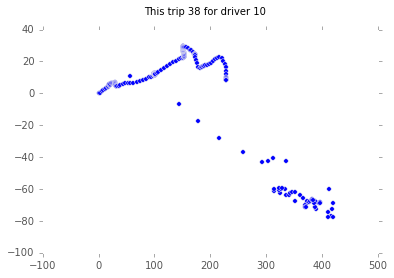

In [50]:
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt

path = os.path.abspath(os.getcwd())
pathtocsv = os.path.normpath(os.path.join(os.path.dirname(path),"input","test",str(driver),str(trip)+".csv"))
df = pd.read_csv(pathtocsv)
print df[:15][['x','y']]

fig = plt.figure()
plt.scatter(df["x"], df["y"])
fig.suptitle("This trip %s for driver %s" % (trip,driver))
plt.style.use('ggplot')
plt.show()

### Methodology and Data Exploration

The Python Data Analysis Library was the most useful tool throughout the entire Data Science Pipeline.  The high-performance, easy-to-use data structures and data analysis tools were extremely useful in managing this set of telematic data.  Outside of the modeling, Team SkidMarks worked exclusively with the pandas library for data ingestion, munging and wrangling, computation and analysis.  

In [92]:
df2 = pd.read_csv(os.path.normpath(os.path.join(os.path.dirname(path),'lin.csv')))
df2.describe()

,driver_id,trip_id,Average Velocity (mph),Max Velocity,Velocity Stdev,Average Acceleration (mph per s),Max Acceleration (mph per s),Acceleration Stdev,Displacement,Total Distance Traveled,Max Direction Change per sec,Direction Stdev,Time (s),Turns,Aggressive Turns,Stops,Large Deceleration Events,Deceleration Events,Max Deceleration Event
count,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4568.000000,3677.000000,4567.000000,4598.000000,4598.000000,4598.000000
mean,17.260331,100.499348,17.147175,44.470426,12.686080,1.196261,15.129481,2.440924,3294.187122,5235.898429,65.338156,103.357364,635.894302,14.998905,3.325265,5.885702,1.148108,7.282949,-26.311419
std,8.051976,57.736723,9.739392,20.566256,4.677273,0.492128,16.974045,1.423880,3922.428325,5196.094907,34.447338,22.784396,397.347300,10.730500,2.911320,5.303458,1.714704,5.987713,24.759571
min,1.000000,1.000000,0.026113,0.448000,0.087896,0.052225,0.448000,0.125665,0.223607,2.809902,0.000000,14.581429,150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-189.903390
25%,12.000000,51.000000,10.243170,33.444520,10.070850,0.955982,7.261200,1.658485,754.345753,1709.648509,45.000000,87.374085,322.000000,8.000000,1.000000,2.000000,0.000000,3.000000,-37.853516
50%,18.000000,100.500000,15.442626,40.990164,12.277559,1.155066,10.358358,2.122245,1703.260498,3473.539084,49.526173,105.238781,518.000000,12.000000,2.000000,4.000000,1.000000,6.000000,-16.563905
75%,24.000000,150.000000,23.641528,52.184187,15.333687,1.405695,16.401309,2.827177,4477.064609,6951.140794,73.298439,119.711785,853.000000,19.000000,4.000000,8.000000,1.000000,10.000000,-7.966956
max,30.000000,200.000000,63.739891,248.217876,32.305577,18.653183,206.493704,36.880746,28904.697758,40731.752107,180.000000,158.809584,1785.000000,73.000000,26.000000,54.000000,28.000000,46.000000,-0.316784


##### Hyperspace Jumps and Flickering
Data Munging and Wrangling was a constant challenge throughout the project. "Hyperspace" jumps or "Flickering" trips skewed the feature calculations, which ultimately impacted the accuracy of the modeling and analysis.  While some techniques reduced the volume of outliers, they were never completely removed. Here is an example:  

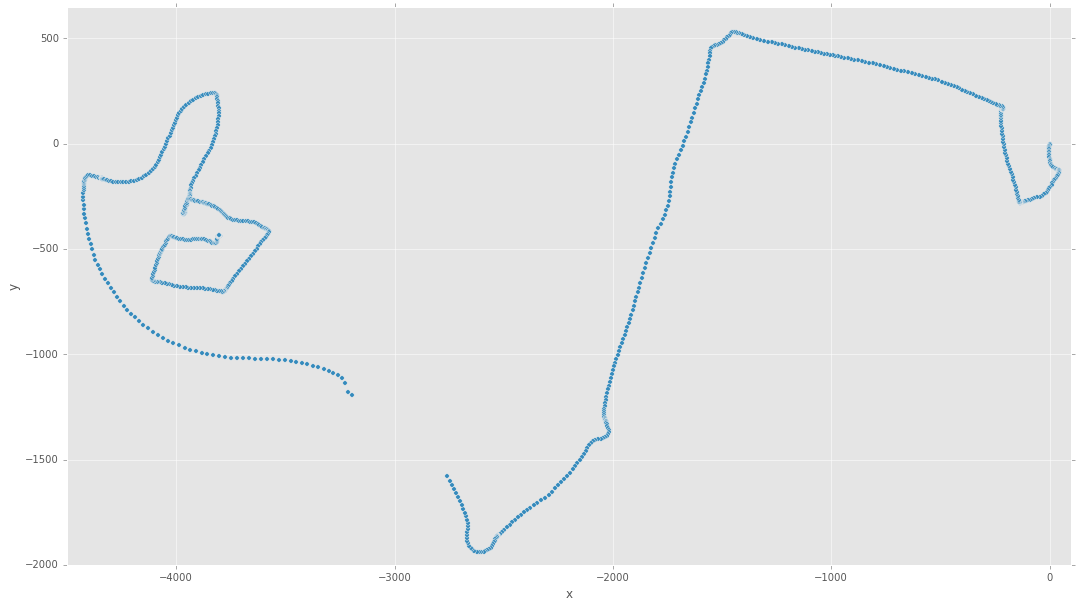

In [58]:
path = os.path.abspath(os.getcwd())
pathtocsv = os.path.normpath(os.path.join(os.path.dirname(path),"input","test","1","200" +".csv"))
df = pd.read_csv(pathtocsv)
df.plot(kind = 'scatter', x = 'x', y = 'y', figsize=(18,10))
plt.ylim(-2000,650)
plt.xlim(-4500,100)
plt.show()



The scatter matrix is a visualizaiton that helps to explore the "character" of the data; some of the feature comparisons may suggest potential correlations or relationships.

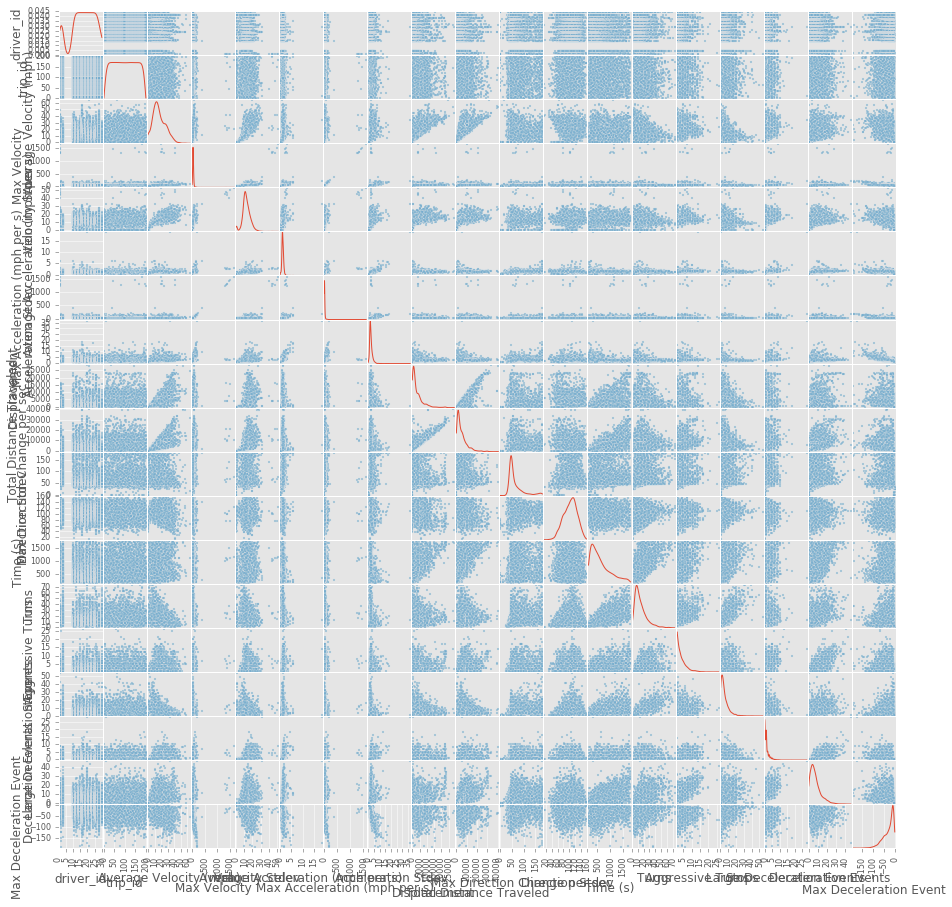

In [62]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

scatter_matrix(df2,alpha=0.5, figsize=(15,15),diagonal='kde')

plt.show()

The first goal is to group a set of drivers into the same group (called a cluster), where drivers within the group are more similar (in some sense or another) to each other than to those in other groups (clusters). The KMeans was used because the algorithm scales well to large data sets and is one of the easier algorithms to implement and return classes.  The initial clustering follows:  

[[ 0.50066998 -0.65516788]
 [ 0.9018219   0.18613817]
 [-0.39328235 -0.74864633]
 ..., 
 [-0.99265416  3.45788391]
 [-0.60310914  0.27961662]
 [-0.36389342  0.74700887]]


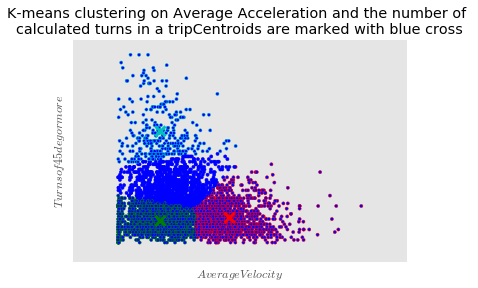

In [91]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer

# Some colors for later
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
  
###
 #load data from a CSV to a dataframe
with open(os.path.normpath(os.path.join(os.path.dirname(path),'lin.csv'))) as in_data:
    crime_data = pd.DataFrame.from_csv(in_data, sep=',')

#crime_data=crime_data.fillna(value=-999)

#load all numeric data into an array. The offense column from the crime data
#is excluded
as_array = np.asfarray(crime_data[['Average Velocity (mph)','Turns']]) #'Max Velocity', 'Velocity Stdev','Average Acceleration (mph per s)', 'Max Acceleration (mph per s)', ' Acceleration Stdev','Displacement','Total Distance Traveled','Max Direction Change per sec', ' Direction Stdev','Time (s)', 'Turns', 'Aggressive Turns', 'Stops', 'Large Deceleration Events', 'Deceleration Events', 'Max Deceleration Event']]])

#number of groups
n_clusters=4

# preprocessing tricks
imputer = Imputer(missing_values="NaN", strategy="mean")
patched = imputer.fit_transform(as_array)

patched = StandardScaler().fit_transform(patched)
#patched = scale(patched, axis=0, with_mean=True)

print patched

#Correct missing data 
#imputer = Imputer(missing_values=-999, strategy="mean")
#patched = imputer.fit_transform(as_array)

#cluster data 
cluster = KMeans(n_clusters=n_clusters)
cluster.fit(patched)

#assigned grouped labels to the crime data
labels = cluster.labels_
crime_data["labels"]=labels

#pdict = create_ordered_dict(crime_data, "labels")
'''
  # Fit the model with our algorithm
model = MiniBatchKMeans(n_clusters=3)
model.fit(as)
'''
# Make Predictions
predictions = cluster.predict(patched)

# Plotting the clusters

#plt.subplot(1,4,idx+1)

plt.scatter(patched[:, 0], patched[:, 1], color=colors[predictions].tolist(), s=10)
centers = cluster.cluster_centers_
center_colors = colors[:len(centers)]
plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors,marker='x', linewidths=3,
            color='white', zorder=10)
plt.title('K-means clustering on Average Acceleration and the number of \ncalculated turns in a trip'
          'Centroids are marked with blue cross')
plt.xticks(())
plt.yticks(())
plt.ylabel('$Turns of 45 deg or more$')
plt.xlabel('$Average Velocity$')
plt.figure(num=1, figsize=(18, 18), dpi=80, facecolor='w', edgecolor='k')

plt.show()

### Description of Methodology

a description of your methodology; what tools, techniques, methods, etc. that you used in each phase of the data science pipeline

### Results

a results section - hopefully with some visuals (graphs, tables, figures, etc.)

### Discussion

a discussion of the work; why did this work or not work? what problems did you encounter? what would you do better? what would you do in the future?

### Conclusion

a conclusion

### Bibliography

a bibliography or works cited

### Appendices

any appendices that highlight key parts of your work (code snippets, data snippets, other graphs, etc.)

In [21]:
import random
plt.figure(1, figsize=(3, 3))
plt.imshow(randomdigits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

NameError: name 'plt' is not defined

## Regressions

Regressions are a type of supervised learning algorithm, where, given continuous input data, the object is to fit a function that is able to predict the continuous value of input features.

### Linear Regression
Linear regression fits a linear model (a line in two dimensions) to the data.

In [22]:
from sklearn.linear_model import LinearRegression

# Fit regression to diabetes dataset
model = LinearRegression()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

NameError: name 'diabetes' is not defined

### Perceptron

A primitive neural network that learns weights for input vectors and transfers the weights through a network to make a prediction.

In [ ]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

### k-Nearest Neighbor Regression

Makes predictions by locating similar cases and returning the average majority.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

### Classification and Regression Trees (CART)

Makes splits of the best separation of the data for the predictions being made.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

### Random Forest

Random forest is an ensemble method that creates a number of decision trees using the CART algorithm, each on a different subset of the data. The general approach to creating the ensemble is bootstrap aggregation of the decision trees (bagging).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

### AdaBoost

Adaptive Boosting (AdaBoost) is an ensemble method that sums the predictions made by multiple decision trees. Additional models are added and trained on instances that were incorrectly predicted (boosting)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

### Support Vector Machines

Uses the SVM algorithm (transforming the problem space into higher dimensions in order to use kernel methods) to make predictions for a linear function.

In [ ]:
from sklearn.svm import SVR

model = SVR()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

## Regularization

Regularization methods decrease the over-fitting of a model by penalizing complexity. These are usually demonstrated on regression algorithms, which is why they are included in this section.

### Ridge Regression

Also known as Tikhonov regularization penalizes a least squares regression model on the square of the absolute magnitiude of the coefficients (the L2 norm)

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

### LASSO

Least Absolute Shrinkage and Selection Operator (LASSO) penalizes the least squares regression on the absolute magnitude of the coefficients (the L1 norm)

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

## Classification

Classification is a supervised machine learning problem where, given labeled input data (with two or more labels), the task is to fit a function that can predict the discrete class of input data.

### Logistic Regression

Fits a logistic model to data and makes predictions about the probability of a categorical event (between 0 and 1). Logistic regressions make predictions between 0 and 1, so in order to classify multiple classes a one-vs-all scheme is used (one model per class, winner-takes-all).

In [ ]:
from sklearn.linear_model import LogisticRegression

splits     = cv.train_test_split(iris.data, iris.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = LogisticRegression()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print classification_report(expected, predicted)

### LDA

Linear Discriminate Analysis (LDA) fits a conditional probability density function (Gaussian) to the attributes of the classes. The discrimination function is linear.

In [ ]:
from sklearn.lda import LDA

splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = LDA()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print classification_report(expected, predicted)

### Naive Bayes

Uses Bayes Theorem (with a naive assumption) to model the conditional relationship of each attribute to the class.

In [ ]:
from sklearn.naive_bayes import GaussianNB

splits     = cv.train_test_split(iris.data, iris.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = GaussianNB()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print classification_report(expected, predicted)

### k-Nearest Neighbor

Makes predictions by locating similar instances via a similarity function or distance and averaging the majority of the most similar. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
# X_train, X_test, y_train, y_test = splits

# model      = KNeighborsClassifier(20)
# model.fit(X_train, y_train)

# expected   = y_test
# predicted  = model.predict(X_test)

# print classification_report(expected, predicted)

help(KNeighborsClassifier)

### Decision Trees

Decision trees use the CART algorithm to make predictions by making splits that best fit the data.

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# splits     = cv.train_test_split(iris.data, iris.target, test_size=0.2)
# X_train, X_test, y_train, y_test = splits

# model      = DecisionTreeClassifier()
# model.fit(X_train, y_train)

# expected   = y_test
# predicted  = model.predict(X_test)

# print classification_report(expected, predicted)

help(DecisionTreeClassifier)

### SVMs

Support Vector Machines (SVM) uses points in transformed problem space that separates the classes into groups.

In [ ]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf']

splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

for kernel in kernels:
    if kernel != 'poly':
        model      = SVC(kernel=kernel)
    else:
        model      = SVC(kernel=kernel, degree=3)
        
    model.fit(X_train, y_train)
    expected   = y_test
    predicted  = model.predict(X_test)

    print classification_report(expected, predicted)

### Random Forest

Random Forest is an ensemble of decision trees on different subsets of the dataset. The ensemble is created by bootstrap aggregation (bagging).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = RandomForestClassifier()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print classification_report(expected, predicted)

## Clustering

Clustering algorithms attempt to find patterns in unlabeled data. They are usually grouped into two main categories: centroidal (find the centers of clusters) and hierarchical (find clusters of clusters).

In order to explore clustering, we'll have to generate some fake datasets to use.

In [ ]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

N = 1000 # Number of samples in each cluster

# Some colors for later
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

circles = make_circles(n_samples=N, factor=.5, noise=.05)
moons   = make_moons(n_samples=N, noise=.08)
blobs   = make_blobs(n_samples=N, random_state=9)
noise   = np.random.rand(N, 2), None

# Let's see what the data looks like!
fig, axe = plt.subplots(figsize=(18, 4))
for idx, dataset in enumerate((circles, moons, blobs, noise)):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    plt.subplot(1,4,idx+1)
    plt.scatter(X[:,0], X[:,1], marker='.')

    plt.xticks(())
    plt.yticks(())
    plt.ylabel('$x_1$')
    plt.xlabel('$x_0$')

plt.show()

### K-Means Clustering

Partition N samples into k clusters, where each sample belongs to a cluster to which it has the closest mean of the neighbors. This problem is NP-hard, but there are good estimations.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

fig, axe = plt.subplots(figsize=(18, 4))
for idx, dataset in enumerate((circles, moons, blobs, noise)):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    # Fit the model with our algorithm
    model = MiniBatchKMeans(n_clusters=3)
    model.fit(X)
    
    # Make Predictions
    predictions = model.predict(X)
    
    # Find centers
    centers = model.cluster_centers_
    center_colors = colors[:len(centers)]
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
    
    plt.subplot(1,4,idx+1)
    plt.scatter(X[:, 0], X[:, 1], color=colors[predictions].tolist(), s=10)

    plt.xticks(())
    plt.yticks(())
    plt.ylabel('$x_1$')
    plt.xlabel('$x_0$')

plt.show()

## Affinity Propagation

Clustering based on the concept of "message passing" between data points. Unlike clustering algorithms such as k-means or k-medoids, AP does not require the number of clusters to be determined or estimated before running the algorithm. Like k-medoids, AP finds "exemplars", members of the input set that are representative of clusters

In [ ]:
from sklearn.cluster import AffinityPropagation


fig, axe = plt.subplots(figsize=(18, 4))
for idx, dataset in enumerate((circles, moons, blobs, noise)):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    # Fit the model with our algorithm
    model = AffinityPropagation(damping=.9, preference=-200)
    model.fit(X)
    
    # Make Predictions
    predictions = model.predict(X)
    
    # Find centers
    centers = model.cluster_centers_
    center_colors = colors[:len(centers)]
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
    
    plt.subplot(1,4,idx+1)
    plt.scatter(X[:, 0], X[:, 1], color=colors[predictions].tolist(), s=10)

    plt.xticks(())
    plt.yticks(())
    plt.ylabel('$x_1$')
    plt.xlabel('$x_0$')

plt.show()

